## Importing libraries

In [1]:
import tensorflow as tf
import os
import shutil
import random## os, random,shutil libraries are used in python for file and directory operations.
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array,save_img
import xml.etree.ElementTree as ET

## Seprating images into classes

In [8]:
# Set the path to the directory containing the XML files
xml_dir = r'C:\Users\rakes\Weed_classification\weed_image_data\Ronin_OPEN_DB\annotations'

# Set the path to the directory containing the images
image_dir = r'C:\Users\rakes\Weed_classification\weed_image_data\Ronin_OPEN_DB\raw images'

# Set the path to the directory where the class folders will be created
output_dir = r'C:\Users\rakes\Weed_classification\weed_image_data\Ronin_OPEN_DB\Labeled_images'

# Get the list of XML files
xml_files = os.listdir(xml_dir)

# Iterate through the XML files and extract class information
for xml_file in xml_files:
    xml_path = os.path.join(xml_dir, xml_file)
    
    # Parse the XML file
    tree = ET.parse(xml_path)
    root = tree.getroot()
    
    # Get the class label from the XML file
    class_label = root.find('object').find('name').text
    
    # Create the class directory if it doesn't exist
    class_dir = os.path.join(output_dir, class_label)
    if not os.path.exists(class_dir):
        os.makedirs(class_dir)
    
    # Move the corresponding image file to the class directory
    image_file = xml_file[:-4] + '.jpg'  # Assuming image files have the same name as XML files
    image_path = os.path.join(image_dir, image_file)
    destination_path = os.path.join(class_dir, image_file)
    shutil.copyfile(image_path, destination_path)

print("Images separated into class folders.")

Images separated into class folders.


## Getting the Dataset,resizing and splitting it

In [2]:
# Set the paths for your dataset
class_dir = r'C:\Users\rakes\Weed_classification\weed_image_data\Ronin_OPEN_DB\Labeled_images'
# Create separate directories for resized images
resized_dir = r'C:\Users\rakes\Weed_classification\weed_image_data\Ronin_OPEN_DB\resized_images'
resized_weed_dir = os.path.join(resized_dir, 'weed')
resized_crop_dir = os.path.join(resized_dir, 'crop')
# Set the target size for resizing
target_size = (257,360)  # Specify the desired width and height

# Create the output directory if it doesn't exist
#if not os.path.exists(output_dir):
 #   os.makedirs(output_dir)
    # Create the resized image directories if they don't exist
if not os.path.exists(resized_dir):
    os.makedirs(resized_dir)
if not os.path.exists(resized_weed_dir):
    os.makedirs(resized_weed_dir)
if not os.path.exists(resized_crop_dir):
    os.makedirs(resized_crop_dir)

# Iterate through the class folders

# Iterate through the class folders
for class_name in os.listdir(class_dir):
    class_path = os.path.join(class_dir, class_name)
    
    # Check if the path is a directory
    if os.path.isdir(class_path):
        
        # Determine the target resized directory based on the class name
        if class_name.lower() == 'weed':
            target_resized_dir = resized_weed_dir
        elif class_name.lower() == 'crop':
            target_resized_dir = resized_crop_dir
        else:
            continue
        
        # Iterate through the images in the class folder
        for filename in os.listdir(class_path):
            image_path = os.path.join(class_path, filename)
            
            # Load the image and resize it
            image = tf.keras.preprocessing.image.load_img(image_path, target_size=target_size)
            
            # Save the resized image to the respective class directory
            resized_image_path = os.path.join(target_resized_dir, filename)
            image.save(resized_image_path)
            
print("Images resized and saved in separate class folders.")

Images resized and saved in separate class folders.


## Data augmentation

In [3]:
# Set the path to the directory containing your original training images
original_dir = r'C:\Users\rakes\Weed_classification\weed_image_data\Ronin_OPEN_DB\resized_images'
# Set the path to the directory where augmented images will be saved
augmented_dir = r'C:\Users\rakes\Weed_classification\weed_image_data\Ronin_OPEN_DB\augmenteted_images_set'

# Set the target size for resizing (if desired)
#target_size = (256, 350)  # Specify the desired width and height
# Create the augmented directory if it doesn't exist
if not os.path.exists(augmented_dir):
    os.makedirs(augmented_dir)

# Define the augmentation parameters
augmentation_params = {
    'rotation_range': 20,
    'width_shift_range': 0.2,
    'height_shift_range': 0.2,
    'shear_range': 0.2,
    'zoom_range': 0.2,
    'horizontal_flip': True,
    'vertical_flip': True
}
fixed_augmented_images=3

# Iterate through the original class folders
for class_name in os.listdir(original_dir):
    class_dir = os.path.join(original_dir, class_name)
    
    # Check if the path is a directory
    if os.path.isdir(class_dir):
        
        # Create a subdirectory for the augmented images of this class
        augmented_class_dir = os.path.join(augmented_dir, class_name)
        if not os.path.exists(augmented_class_dir):
            os.makedirs(augmented_class_dir)
        
        # Set up the image data generator for augmentation
        image_data_generator = ImageDataGenerator(**augmentation_params)
        
        # Get the list of image files in the original class folder
        image_files = os.listdir(class_dir)
        
        # Iterate through the image files
        for filename in image_files:
            image_path = os.path.join(class_dir, filename)
            
            # Load the image
            image = tf.keras.preprocessing.image.load_img(image_path)
            
            # Convert the image to an array
            image_array = tf.keras.preprocessing.image.img_to_array(image)
            
            # Reshape the array to match the expected input shape for data augmentation
            image_array = image_array.reshape((1,) + image_array.shape)
            
            # Generate augmented images
            augmented_images = image_data_generator.flow(image_array, batch_size=1)
            
            # Save the augmented images
            for i in  range(fixed_augmented_images):
                augmented_image=next(augmented_images)
                augmented_filename = f"augmented_{i}_{filename}"
                augmented_image_path = os.path.join(augmented_class_dir, augmented_filename)
                augmented_image = tf.keras.preprocessing.image.array_to_img(augmented_image[0])
                augmented_image.save(augmented_image_path)
                
print("Data augmentation completed.")

Data augmentation completed.


## splitting the dataset

In [4]:
# Set the path to the directory containing the augmented class folders
augmented_dir = r'C:\Users\rakes\Weed_classification\weed_image_data\Ronin_OPEN_DB\augmenteted_images_set'

# Set the path to the directory where the train, test, and validation sets will be saved
output_dir = r'C:\Users\rakes\Weed_classification\weed_image_data\Ronin_OPEN_DB\slpit_dataset'

# Set the train, test, and validation ratios
train_ratio = 0.7
test_ratio = 0.15
validation_ratio = 0.15


# Iterate through the augmented class folders
for class_name in os.listdir(augmented_dir):
    class_dir = os.path.join(augmented_dir, class_name)
    
    # Check if the path is a directory
    if os.path.isdir(class_dir):
        
        # Create separate directories for train, test, and validation sets for each class
        train_dir = os.path.join(output_dir, 'train', class_name)
        test_dir = os.path.join(output_dir, 'test', class_name)
        validation_dir = os.path.join(output_dir, 'validation', class_name)
        
        # Create the train, test, and validation directories if they don't exist
        if not os.path.exists(train_dir):
            os.makedirs(train_dir)
        if not os.path.exists(test_dir):
            os.makedirs(test_dir)
        if not os.path.exists(validation_dir):
            os.makedirs(validation_dir)
        
        # Get the list of augmented image files in the class folder
        image_files = os.listdir(class_dir)
        
        # Shuffle the image files randomly
        random.shuffle(image_files)
        
        # Calculate the number of images for each set
        num_images = len(image_files)
        num_train = int(train_ratio * num_images)
        num_test = int(test_ratio * num_images)
        num_validation = num_images - num_train - num_test
        
        # Split the images into train, test, and validation sets
        train_images = image_files[:num_train]
        test_images = image_files[num_train:num_train+num_test]
        validation_images = image_files[num_train+num_test:]
        
        # Move the train images to the train directory
        for train_image in train_images:
            train_image_path = os.path.join(class_dir, train_image)
            destination_path = os.path.join(train_dir, train_image)
            shutil.copyfile(train_image_path, destination_path)
        
        # Move the test images to the test directory
        for test_image in test_images:
            test_image_path = os.path.join(class_dir, test_image)
            destination_path = os.path.join(test_dir, test_image)
            shutil.copyfile(test_image_path, destination_path)
        
        # Move the validation images to the validation directory
        for validation_image in validation_images:
            validation_image_path = os.path.join(class_dir, validation_image)
            destination_path = os.path.join(validation_dir, validation_image)
            shutil.copyfile(validation_image_path, destination_path)

print("Dataset split into train, test, and validation sets.")


Dataset split into train, test, and validation sets.


In [5]:
print("Train set contain: ",len(train_files))
print("Test set contain: ",len(test_files))
print("Validation set contain: ",len(val_files))

NameError: name 'train_files' is not defined

## Now applying algorithm

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
 #Set the paths to the train, test, and validation directories
train_dir =r'C:\Users\rakes\Weed_classification\weed_image_data\Ronin_OPEN_DB\slpit_dataset\train'
test_dir = r'C:\Users\rakes\Weed_classification\weed_image_data\Ronin_OPEN_DB\slpit_dataset\test'
validation_dir = r'C:\Users\rakes\Weed_classification\weed_image_data\Ronin_OPEN_DB\slpit_dataset\validation'

# Set the image dimensions and the number of classes
image_width = 360
image_height = 257
num_classes = 2

# Set the batch size and number of epochs
batch_size = 32
epochs = 7

# Create the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(image_width, image_height, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Set up the image data generators
train_datagen = ImageDataGenerator(rescale=1.0/255)
test_datagen = ImageDataGenerator(rescale=1.0/255)
validation_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(image_width, image_height),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(image_width, image_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(image_width, image_height),
    batch_size=batch_size,
    class_mode='categorical',
)

# Train the model
model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

Found 5034 images belonging to 2 classes.
Found 1367 images belonging to 2 classes.
Found 1382 images belonging to 2 classes.
Epoch 1/7
157/157 [==============================] - 181s 1s/step - loss: 0.2119 - accuracy: 0.9340 - val_loss: 0.1067 - val_accuracy: 0.9593
Epoch 2/7
157/157 [==============================] - 182s 1s/step - loss: 0.2589 - accuracy: 0.8950 - val_loss: 0.1979 - val_accuracy: 0.9295
Epoch 3/7
157/157 [==============================] - 183s 1s/step - loss: 0.1452 - accuracy: 0.9522 - val_loss: 0.1094 - val_accuracy: 0.9600
Epoch 4/7
157/157 [==============================] - 182s 1s/step - loss: 0.1212 - accuracy: 0.9618 - val_loss: 0.1061 - val_accuracy: 0.9600
Epoch 5/7
157/157 [==============================] - 177s 1s/step - loss: 0.1235 - accuracy: 0.9606 - val_loss: 0.1109 - val_accuracy: 0.9586
Epoch 6/7
157/157 [==============================] - 185s 1s/step - loss: 0.1038 - accuracy: 0.9652 - val_loss: 0.1073 - val_accuracy: 0.9608
Epoch 7/7
43/43 [=====

## Performance analaysis of the model

In [5]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

43/43 [==============================] - 11s 253ms/step
              precision    recall  f1-score   support

        crop       0.98      0.90      0.94       444
        weed       0.95      0.99      0.97       923

    accuracy                           0.96      1367
   macro avg       0.97      0.95      0.96      1367
weighted avg       0.96      0.96      0.96      1367



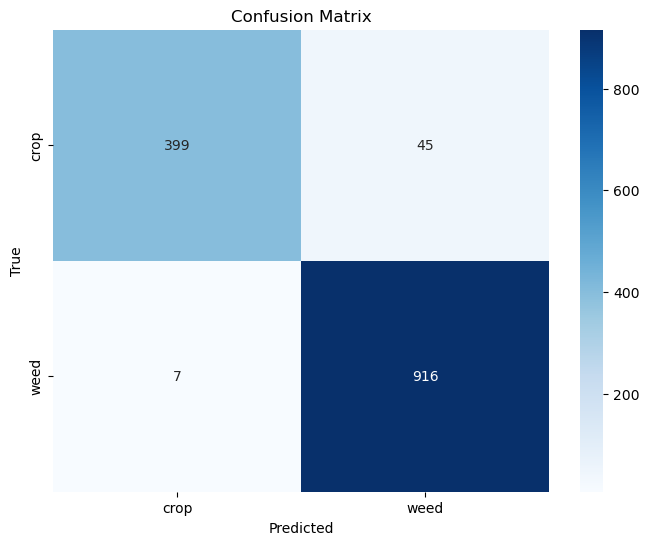

In [6]:

# Make predictions on the test dataset
predictions = model.predict(test_generator)

# Convert the predicted probabilities to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Get the true labels of the test dataset
true_labels = test_generator.classes

# Generate a classification report
class_labels = list(test_generator.class_indices.keys())
report = classification_report(true_labels, predicted_labels, target_names=class_labels)
print(report)

# Generate a confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

43/43 [==============================] - 11s 244ms/step


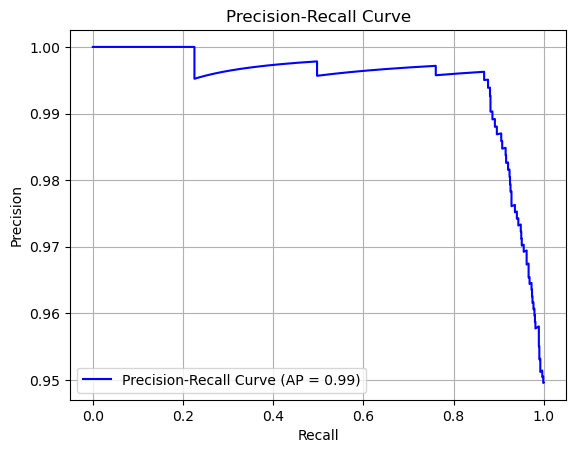

In [8]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

# Get the predicted class probabilities
predicted_probabilities = model.predict(test_generator)

# Extract the probabilities for the positive class
positive_probabilities = predicted_probabilities[:, 1]

# Calculate precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(true_labels, positive_probabilities)

# Calculate average precision score
average_precision = average_precision_score(true_labels, positive_probabilities)

# Plot the precision-recall curve
plt.plot(recall, precision, color='blue', label='Precision-Recall Curve (AP = %0.2f)' % average_precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()


## Predict on user input

In [10]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

In [14]:
# Define the target image size for resizing
target_size = (257, 360)

class_names={
    0:'crop',1:'weed'
}

# Function to preprocess the user input image
def preprocess_image(image_path):
    # Load the image using OpenCV
    image = cv2.imread(image_path)
    # Resize the image
    image = cv2.resize(image, target_size)
    # Convert the image to a numpy array and normalize the pixel values
    image = image.astype(np.float32) / 255
    # Expand the dimensions to match the input shape of the model
    image = np.expand_dims(image, axis=0)
    return image

# Function to predict the class of the user input image
def predict_class(image_path):
    # Preprocess the image
    image = preprocess_image(image_path)
    # Make predictions using the model
    predictions = model.predict(image)
    # Get the predicted class label
    predicted_label = np.argmax(predictions[0])
    return predicted_label

# Take user input for the image file path00
image_path = r"C:\Users\rakes\Weed_classification\weed_image_data\Ronin_OPEN_DB\slpit_dataset\test\weed\augmented_0_32630.jpg"

# Predict the class of the user input image
predicted_class = predict_class(image_path)
#get the name of the predicited class
predicted_class_name=class_names[predicted_class]

# Print the predicted class
print("Predicted class:", predicted_class_name)

1/1 [==============================] - 0s 129ms/step
Predicted class: weed
